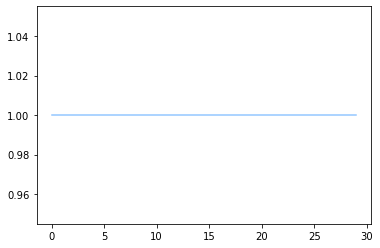

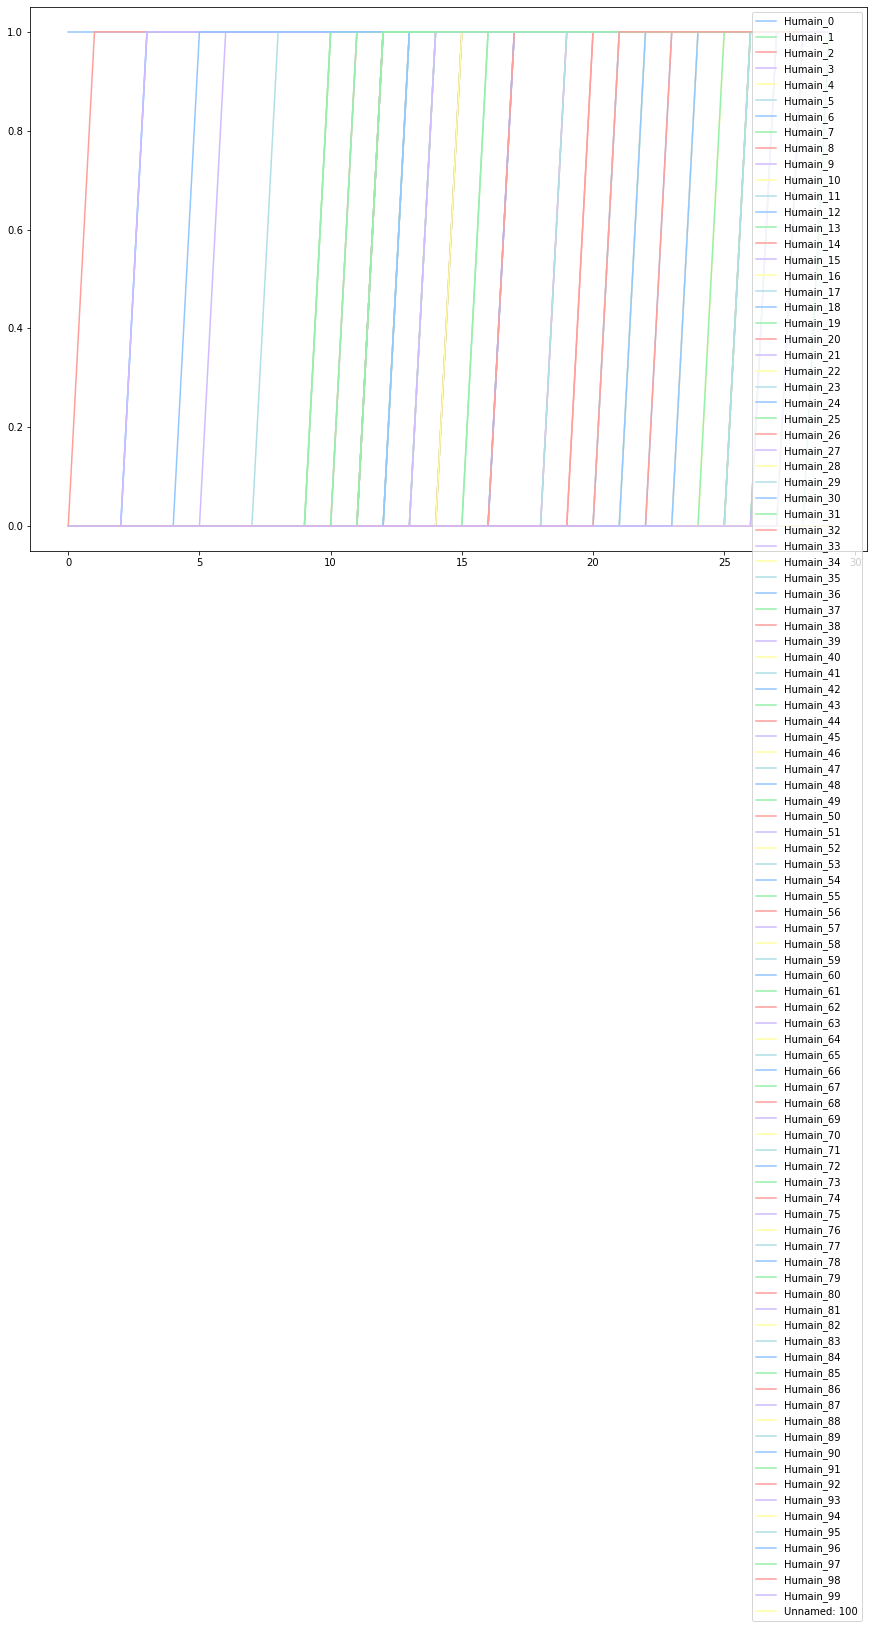

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
from itertools import count
from matplotlib.animation import FuncAnimation

# Lecture des fichiers
contamine = pd.read_csv("/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/Systeme_1/data_csv/Humain_contamine.csv")


contamine['Humain_0'].plot()
contamine.plot(figsize=(15,10))
plt.show()


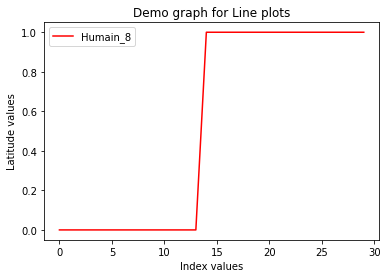

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
from itertools import count
from matplotlib.animation import FuncAnimation

# Lecture des fichiers
contamine = pd.read_csv("/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/Systeme_1/data_csv/Humain_contamine.csv")
# genomeAP = pd.read_csv(r'/home/kilian/Documents/Automate_Cellulaire/Diversity/data/genomeAP.csv')
# genomeH = pd.read_csv(r'/home/kilian/Documents/Automate_Cellulaire/Diversity/data/genomeH.csv')
# hx = pd.read_csv(r'/home/kilian/Documents/Automate_Cellulaire/Diversity/data/hx.csv')
# hy = pd.read_csv(r'/home/kilian/Documents/Automate_Cellulaire/Diversity/data/hy.csv')
# immune = pd.read_csv(r'/home/kilian/Documents/Automate_Cellulaire/Diversity/data/immune.csv')

# print(contamine[:3])
# print(contamine[:3]['Humain_0'])
# print(contamine.iloc[:3,:3]) # access i,j coords
# sum_contamine = contamine.sum(axis=1)
# sum_contamine.plot(figsize=(15,10))
# plt.show()


contamine_data = pd.DataFrame(contamine)
ax = plt.gca()
contamine_data.plot(kind='line',y = 'Humain_8',ax=ax,color='red')
ax.set_xlabel("Index values")
ax.set_ylabel("Latitude values")
plt.title('Demo graph for Line plots')
plt.show()


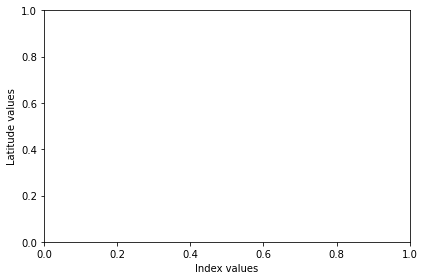

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random
from itertools import count
from matplotlib.animation import FuncAnimation

'''
fig, ax = plt.subplot()
ax.set_xlim(0,105)
ax.set_ylim(0,12)
line, = ax.plot(0,0)
'''

ax = plt.gca()
ax.set_xlabel("Index values")
ax.set_ylabel("Latitude values")

def animate(i):
    contamine = pd.read_csv("/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/Systeme_1/data_csv/Humain_contamine.csv")
    sum_contamine = contamine.sum(axis=1)
    plt.cla()
    plt.title("Contaminations")
    sum_contamine.plot(figsize=(15, 8))
    plt.xlabel("Itérations")
    plt.ylabel("Nombre d'infectés")
    plt.tight_layout()


ani = FuncAnimation(plt.gcf(), animate, interval=100)

plt.tight_layout()
plt.show()

In [25]:
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df = pd.read_csv(url, delimiter=',', header='infer')
df_interest = df.loc[
    df['Country/Region'].isin(['United Kingdom', 'US', 'Italy', 'Germany'])
    & df['Province/State'].isna()]
df_interest.rename(
    index=lambda x: df_interest.at[x, 'Country/Region'], inplace=True)
df1 = df_interest.transpose()
df1 = df1.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)

/home/maxime/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


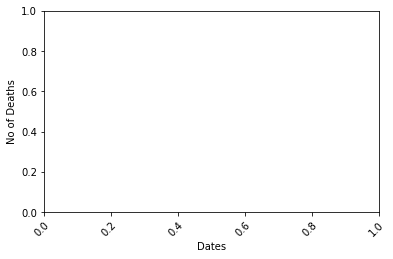

In [26]:
import numpy as np
import matplotlib.pyplot as plt
color = ['red', 'green', 'blue', 'orange']
fig = plt.figure()
plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('No of Deaths')
plt.xlabel('Dates')

def buildmebarchart(i=int):
    plt.legend(df1.columns)
    p = plt.plot(df1[:i].index, df1[:i].values) #note it only returns the dataset, up to the point i
    for i in range(0,4):
        p[i].set_color(color[i]) #set the colour of each curve
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, buildmebarchart, interval = 100)
plt.show()

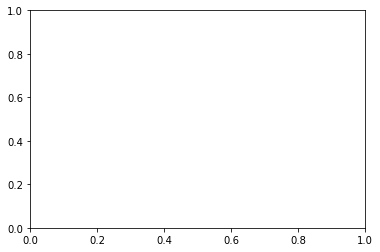

In [34]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
explode=[0.01,0.01,0.01,0.01] #pop out each slice from the pie
def getmepie(i):
    def absolute_value(val): #turn % back to a number
        a  = np.round(val/100.*df1.head(i).max().sum(), 0)
        return int(a)
    ax.clear()
    plot = df1.head(i).max().plot.pie(y=df1.columns,autopct=absolute_value, label='',explode = explode, shadow = True)
    plot.set_title('Total Number of Deaths\n' + str(df1.index[min( i, len(df1.index)-1 )].strftime('%y-%m-%d')), fontsize=12)
import matplotlib.animation as ani
animator = ani.FuncAnimation(fig, getmepie, interval = 200)
plt.show()

In [28]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    iv = min(i, len(df1.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = df1.max().index
    y_pos = np.arange(len(objects))
    performance = df1.iloc[[iv]].values.tolist()[0]
    if bar == 'vertical':
        plt.bar(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.xticks(y_pos, objects)
        plt.ylabel('Deaths')
        plt.xlabel('Countries')
        plt.title('Deaths per Country \n' + str(df1.index[iv].strftime('%y-%m-%d')))
    else:
        plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.yticks(y_pos, objects)
        plt.xlabel('Deaths')
        plt.ylabel('Countries')
animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
plt.show()

<Figure size 432x288 with 0 Axes>

MovieWriter imagemagick unavailable; using Pillow instead.


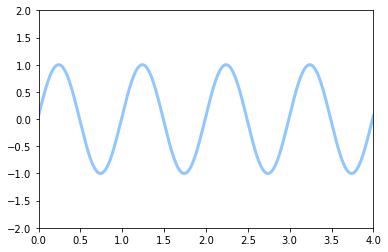

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

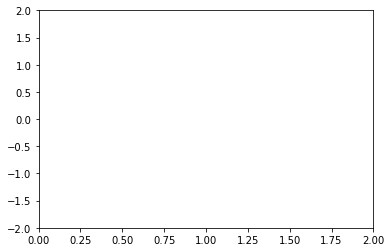

In [33]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

plt.show()